In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("./data/Fish.csv")
df = df.loc[df["Species"] == "Perch", ["Species", "Length2", "Weight"]]
df.head()

,Species,Length2,Weight
72,Perch,8.4,5.9
73,Perch,13.7,32.0
74,Perch,15.0,40.0
75,Perch,16.2,51.5
76,Perch,17.4,70.0


In [3]:
x_train, x_test, y_train, y_test = train_test_split(df["Length2"], df["Weight"], test_size = 0.25, random_state = 8)
x_train = np.reshape(x_train.values, (-1, 1))
x_test = np.reshape(x_test.values, (-1, 1))

# 선형 회귀(linear regression)

- 피처를 가장 잘 표현하는 하나의 직선을 학습하는 알고리즘

- 장점
    - 계수들에 대한 해석이 간단
    - 학습과 예측 속도가 빠름
    - 회귀식이 만들어져서 예측이 어떻게 됐는지 쉽게 이해할 수 있음
    
- 단점
    - 데이터가 선형적이지 않을 경우 모델이 데이터에 적합하지 않을 수 있음
    - 이상치에 민감
    
- 선형회귀의 기본 가정
    - 선형회귀 모델이 효과적으로 작동하기 위해서는 몇 가지 기본적인 가정이 충족되어야 함
    
    - 선형성
        - 예측하고자 하는 종속변수 y와 독립변수 간에 선형성을 만족
    
    - 등분산성
        - 독립변수의 모든 값에 대해 종속변수의 오차항의 분산이 일정해야함
        
    - 독립성
        - 오차 항은 서로 독립적이어햐 함
        - 어떤 데이터의 오차가 다른 데이터의 오차와 관련이 없어야 함
        
    - 정규성
        - 오차 항은 정규 분포를 따라야 함

In [4]:
lr = LinearRegression()

In [5]:
# 선형회귀 모델 훈련
lr.fit(x_train, y_train)

LinearRegression()

In [6]:
# 50cm 농어에 대한 예측
lr.predict([[50]])

array([1208.91738193])

- 선형회귀 모델이 찾은 가장 적합한 직선은 lr객체에 저장되어 있음

In [7]:
# 계수(coefficient), y절편
print(lr.coef_, lr.intercept_)

[36.90201295] -636.1832657559038


- 회귀식 : 36.9 * Length2 + (-636.18)
- coef_와 intercept_ 처럼 머신러닝이 찾은 값을 모델 파라미터(model parameter)라고 부름
- 즉, 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것
- 선형회귀와 같이 모델 파라미터를 훈련하는 것을 **모델 기반 학습** 이라고 하고 KNN과 같이 모델 파라미터가 없이 훈련데이터를 저장하는 훈련 방법을 **사례 기반 학습** 이라고 함

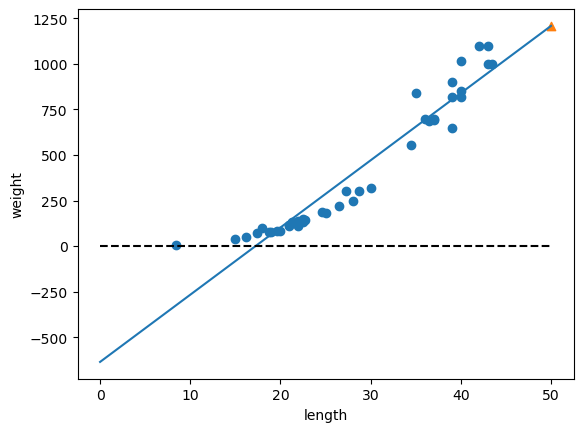

In [8]:
# 훈련 데이터와 회귀선 시각화
plt.figure()

plt.scatter(x_train, y_train)
plt.plot([0, 50], [lr.intercept_, 50 * lr.coef_[0] + lr.intercept_])
plt.plot([0, 50], [0, 0], "k--")
plt.scatter(50, 1208, marker = "^")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 모델 평가

In [9]:
lr.score(x_test, y_test)

0.8998213820795294

In [10]:
pred = lr.predict(x_test)

In [11]:
mae = mean_absolute_error(y_test, pred)
mae

77.12340104853726

# 다항 회귀

- 실제 농어의 무게는 일직선이라기보다는 왼쪽위로 구부러진 곡선에 가깝기 때문에 직선보다는 곡선으로 예측하는 것이 더 적합
- 길이를 제곱한 항을 추가하여 2차 방정식의 그래프 형태로 학습

In [12]:
df["squared"] = df["Length2"] ** 2

In [13]:
df.head()

,Species,Length2,Weight,squared
72,Perch,8.4,5.9,70.56
73,Perch,13.7,32.0,187.69
74,Perch,15.0,40.0,225.00
75,Perch,16.2,51.5,262.44
76,Perch,17.4,70.0,302.76


In [14]:
# 데이터 분할(75 : 25)
x_train, x_test, y_train, y_test = train_test_split(df[["Length2", "squared"]], df["Weight"], test_size = 0.25, random_state = 8)

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(x_train, y_train)

LinearRegression()

In [17]:
lr.score(x_test, y_test)

0.9759795992416924

In [18]:
pred = lr.predict(x_test)

In [19]:
mae = mean_absolute_error(y_test, pred)
mae

29.536850660648675

In [20]:
# 50cm 농어에 대한 예측
lr.predict([[50, 2500]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1584.99253636])

In [22]:
# 회귀식
print(lr.coef_, lr.intercept_)

[-23.33198996   1.0444934 ] 140.35853414083124


- 회귀식 : -23.33 * Length2 + 1.04 * squared + 140.36

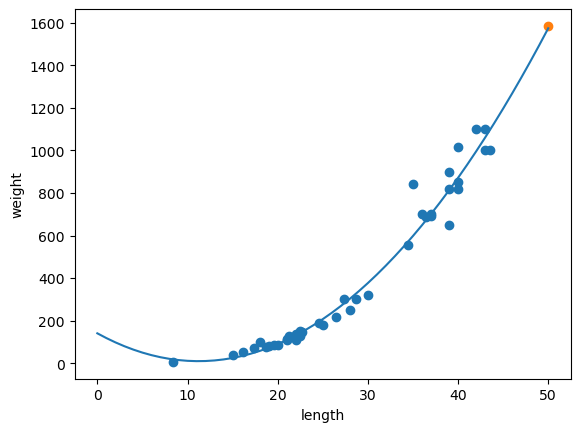

In [23]:
# 다항회귀 시각화
points = np.arange(51)

plt.scatter(x_train["Length2"], y_train)
plt.plot(points, -23.33 * points + points**2 * 1.04 + 140.36)
plt.scatter(50, 1584.99)

plt.xlabel("length")
plt.ylabel("weight")
plt.show()